In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

In [2]:
diabetes = datasets.load_diabetes()
# diabetes

In [3]:
# print(diabetes["DESCR"])
# diabetes.data[0:-30]
# diabetes.data[-20:]

In [4]:
# Splitting the data

diabetes_data = diabetes.data[:, np.newaxis ,2]
# np.newaxis: It's used to increase the dimension of the existing array by one more dimension.
# In this case, it seems to be adding a new axis at position 1 (since it's placed after the comma but before the 2).
# 2: This part seems to be selecting only the third column (index 2) of the dataset. The np.newaxis operation is applied to this column.
# So, the entire line is taking the third column of the diabetes dataset and adding a new axis to it, possibly to reshape the data for
# further processing or analysis.

X_train = diabetes_data[:-30]
X_test = diabetes_data[-20:]

y_train = diabetes.target[:-30]
y_test = diabetes.target[-20:]

# Linear Regression

In [5]:
# Training Model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
# Making Prediction
y_predict = reg.predict(X_test)

print("Actual value: ", y_test[0])
print("Predictes value: ", y_predict[0])

Actual value:  233.0
Predictes value:  226.70014103362246


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

r2 = r2_score(y_test, y_predict)  # more the r2 close to 1 better the model
print(r2)

2561.320427728385
50.609489502744296
0.4698332434180642


In [8]:
weights = reg.coef_
print(weights)

intercept = reg.intercept_
print(intercept)

[941.43097333]
153.39713623331644


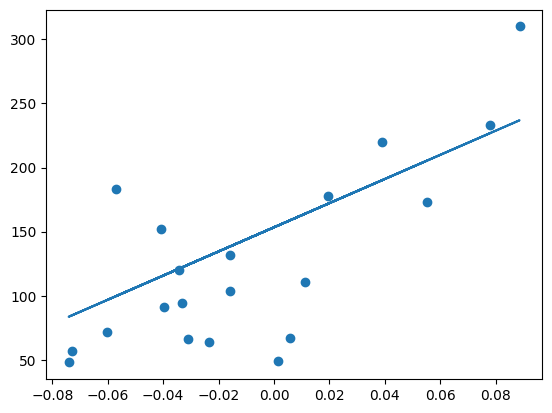

In [9]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict)
plt.show()

# Lasso Regression
It eliminates the less important values

In [10]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train, y_train)

Lasso()

In [11]:
ls_predict = ls.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, ls_predict)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

r2 = r2_score(y_test, ls_predict) 
print(r2)

3489.1145965410956
59.068727737620144
0.2777894757074708


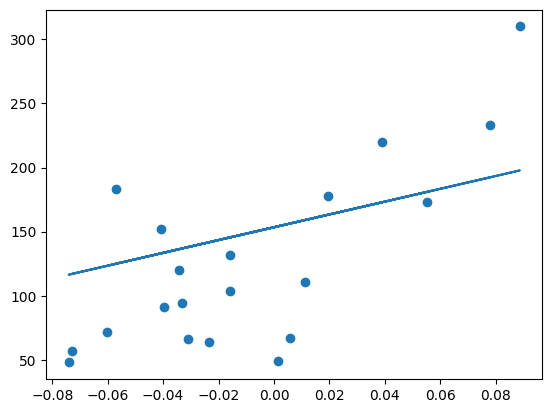

In [13]:
plt.scatter(X_test, y_test)
plt.plot(X_test, ls_predict)
plt.show()

### Ridge Regression
It protect model from overfitting

In [14]:
from sklearn.linear_model import Ridge
ri = Ridge()
ri.fit(X_train, y_train)

Ridge()

In [15]:
ri_predict = ri.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, ri_predict)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

r2 = r2_score(y_test, ri_predict)
print(r2)

3632.5411985736637
60.27056660239444
0.24810165704020082


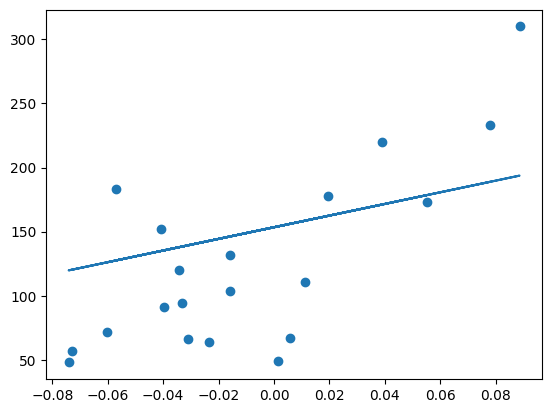

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, ri_predict)
plt.show()